# bSMOTE: Borderline-1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('DTI_with_group.csv')
# remove unnecessary columns + confounding
df = df.drop(['IMAGEUID', 'COLPROT', 'RID', 'VISCODE', 
                          'VISCODE2', 'EXAMDATE', 'VERSION', 'MANUFACTURER',
                         'RUNDATE', 'STATUS', 'QC', 'update_stamp', 'Age', 'VOLUMES', 'Sex'], axis=1)
# remove rows with empty values
df = df.dropna()
df

,AD_MCP,AD_PCT,AD_GCC,AD_BCC,AD_SCC,AD_FX,AD_CST_R,AD_CST_L,AD_ML_R,AD_ML_L,...,RD_FXST,RD_SLF,RD_SFO,RD_UNC,RD_TAP,RD_IC,RD_CC,RD_CR,RD_FULLWM,Research Group
0,0.001177,0.000974,0.001479,0.001474,0.001575,0.002257,0.001079,0.001081,0.001285,0.001287,...,0.000662,0.000577,0.000551,0.000600,0.001139,0.000491,0.000562,0.000638,0.000571,CN
2,0.001213,0.001075,0.001567,0.001585,0.001686,0.002492,0.001046,0.001056,0.001149,0.001126,...,0.000769,0.000694,0.000902,0.000717,0.001507,0.000626,0.000701,0.000851,0.000723,CN
3,0.001101,0.000965,0.001440,0.001433,0.001456,0.002379,0.000985,0.000990,0.001118,0.001113,...,0.000614,0.000546,0.000562,0.000553,0.000950,0.000448,0.000512,0.000587,0.000531,CN
4,0.001053,0.000904,0.001433,0.001470,0.001450,0.002421,0.000966,0.000977,0.001047,0.001041,...,0.000607,0.000535,0.000551,0.000530,0.000862,0.000437,0.000509,0.000573,0.000522,CN
5,0.001131,0.000974,0.001469,0.001498,0.001531,0.002291,0.000994,0.001017,0.001128,0.001105,...,0.000621,0.000559,0.000586,0.000558,0.000901,0.000458,0.000527,0.000605,0.000545,CN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
963,0.001117,0.001011,0.001574,0.001646,0.001712,0.002214,0.001094,0.001118,0.001228,0.001248,...,0.000734,0.000647,0.000913,0.000599,0.001623,0.000538,0.000680,0.000744,0.000652,AD
964,0.001181,0.001002,0.001423,0.001505,0.001530,0.002266,0.001088,0.001103,0.001224,0.001203,...,0.000584,0.000593,0.000624,0.000619,0.000878,0.000487,0.000567,0.000618,0.000571,CN
965,0.001126,0.000949,0.001542,0.001747,0.001642,0.002565,0.000978,0.001052,0.001162,0.001190,...,0.000577,0.000589,0.000835,0.000534,0.001478,0.000440,0.000694,0.000659,0.000597,AD
966,0.001090,0.000976,0.001354,0.001421,0.001427,0.001928,0.001018,0.001007,0.001241,0.001188,...,0.000560,0.000517,0.000514,0.000566,0.000729,0.000441,0.000469,0.000534,0.000509,CN


In [2]:
from imblearn.over_sampling import BorderlineSMOTE as bSMOTE
X = df.iloc[:, df.columns != 'Research Group'].values
y = df.iloc[:, -1].values
X_resampled, y_resampled = bSMOTE(kind='borderline-1').fit_resample(X, y)

In [3]:
from numpy import mean
from numpy import std
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.33, random_state = 8)

In [4]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=2000, learning_rate=learning_rate, max_depth=5, random_state=8)
    gb_clf.fit(X_train, y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_test, y_test)))

Learning rate:  0.05
Accuracy score (training): 1.000
Accuracy score (validation): 0.905
Learning rate:  0.075
Accuracy score (training): 1.000
Accuracy score (validation): 0.906
Learning rate:  0.1
Accuracy score (training): 1.000
Accuracy score (validation): 0.906
Learning rate:  0.25
Accuracy score (training): 1.000
Accuracy score (validation): 0.911
Learning rate:  0.5
Accuracy score (training): 1.000
Accuracy score (validation): 0.904
Learning rate:  0.75
Accuracy score (training): 1.000
Accuracy score (validation): 0.889
Learning rate:  1
Accuracy score (training): 1.000
Accuracy score (validation): 0.884


In [6]:
gb_clf2 = GradientBoostingClassifier(n_estimators=2000, learning_rate=0.05, max_depth=5, random_state=8)
gb_clf2.fit(X_train, y_train)
predictions = gb_clf2.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix:
[[147   0   0   0   3   0]
 [  4 113  10   2  30   1]
 [  2   8 139   3   4   1]
 [  1   1   0 164   1   0]
 [  1  12   2   1 152   3]
 [  1   1   1   0   0 167]]
Classification Report
              precision    recall  f1-score   support

          AD       0.94      0.98      0.96       150
          CN       0.84      0.71      0.77       160
        EMCI       0.91      0.89      0.90       157
        LMCI       0.96      0.98      0.97       167
         MCI       0.80      0.89      0.84       171
         SMC       0.97      0.98      0.98       170

    accuracy                           0.90       975
   macro avg       0.90      0.90      0.90       975
weighted avg       0.90      0.90      0.90       975



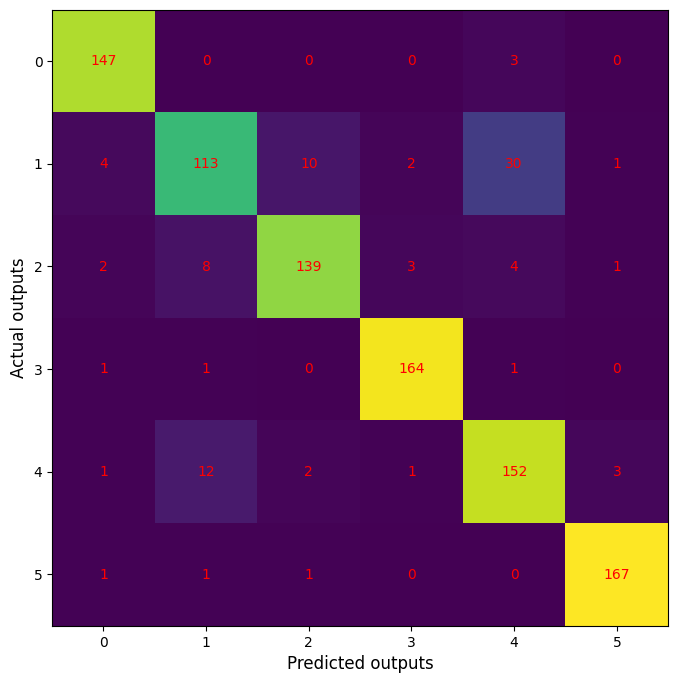

In [7]:
cm = confusion_matrix(y_test, predictions)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', fontsize=12, color='black')
ax.set_ylabel('Actual outputs', fontsize=12, color='black')
ax.xaxis.set(ticks=range(6))
ax.yaxis.set(ticks=range(6))
for i in range(6):
    for j in range(6):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

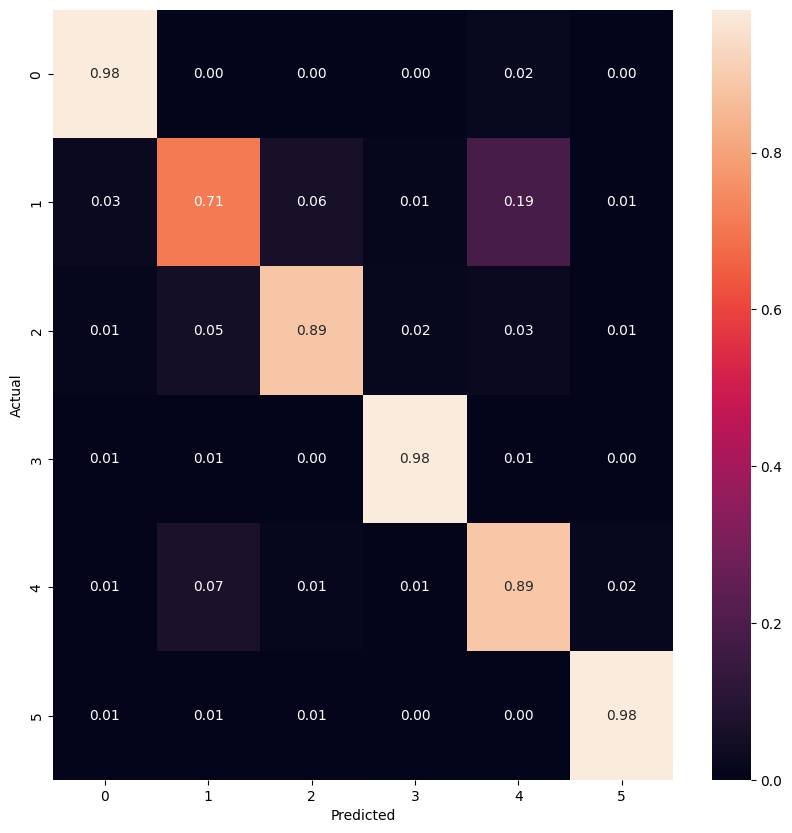

In [8]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cmn, annot=True, fmt='.2f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

### Combined MCI groups

In [9]:
df = pd.read_csv('DTI_with_group_comb.csv')
# remove unnecessary columns + confounding
df = df.drop(['IMAGEUID', 'COLPROT', 'RID', 'VISCODE', 
                          'VISCODE2', 'EXAMDATE', 'VERSION', 'MANUFACTURER',
                         'RUNDATE', 'STATUS', 'QC', 'update_stamp', 'Age', 'VOLUMES', 'Sex'], axis=1)
# remove rows with empty values
df = df.dropna()

In [10]:
X = df.iloc[:, df.columns != 'Research Group'].values
y = df.iloc[:, -1].values
X_resampled, y_resampled = bSMOTE(kind='borderline-1').fit_resample(X, y)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.33, random_state = 11)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=2000, learning_rate=learning_rate, max_depth=5, random_state=11)
    gb_clf.fit(X_train, y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_test, y_test)))

Learning rate:  0.05
Accuracy score (training): 1.000
Accuracy score (validation): 0.794
Learning rate:  0.075
Accuracy score (training): 1.000
Accuracy score (validation): 0.794
Learning rate:  0.1
Accuracy score (training): 1.000
Accuracy score (validation): 0.794
Learning rate:  0.25
Accuracy score (training): 1.000
Accuracy score (validation): 0.812
Learning rate:  0.5
Accuracy score (training): 1.000
Accuracy score (validation): 0.809
Learning rate:  0.75
Accuracy score (training): 1.000
Accuracy score (validation): 0.812
Learning rate:  1
Accuracy score (training): 1.000
Accuracy score (validation): 0.792


In [13]:
gb_clf2 = GradientBoostingClassifier(n_estimators=2000, learning_rate=0.5, max_depth=5, random_state=11)
gb_clf2.fit(X_train, y_train)
predictions = gb_clf2.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix:
[[180   3   5]
 [  4 135  43]
 [  8  42 129]]
Classification Report
              precision    recall  f1-score   support

          AD       0.94      0.96      0.95       188
          CN       0.75      0.74      0.75       182
         MCI       0.73      0.72      0.72       179

    accuracy                           0.81       549
   macro avg       0.81      0.81      0.81       549
weighted avg       0.81      0.81      0.81       549



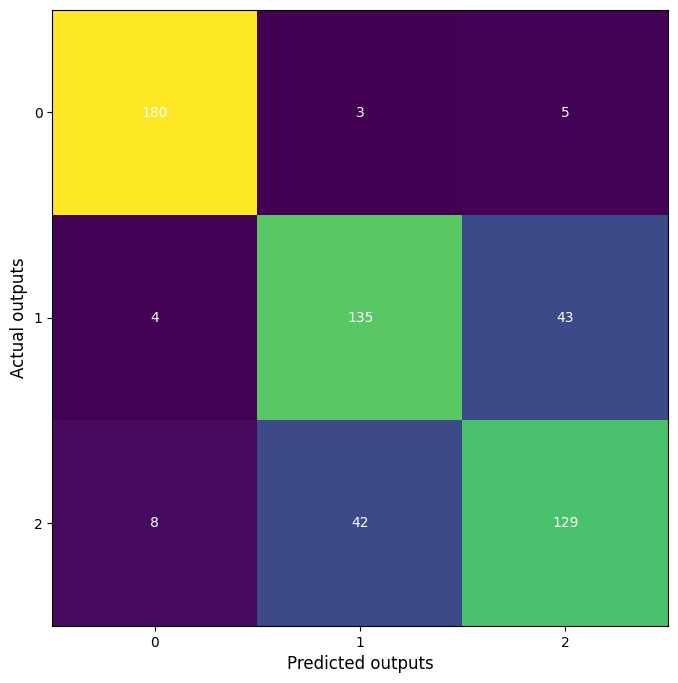

In [14]:
cm = confusion_matrix(y_test, predictions)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', fontsize=12, color='black')
ax.set_ylabel('Actual outputs', fontsize=12, color='black')
ax.xaxis.set(ticks=range(3))
ax.yaxis.set(ticks=range(3))
for i in range(3):
    for j in range(3):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

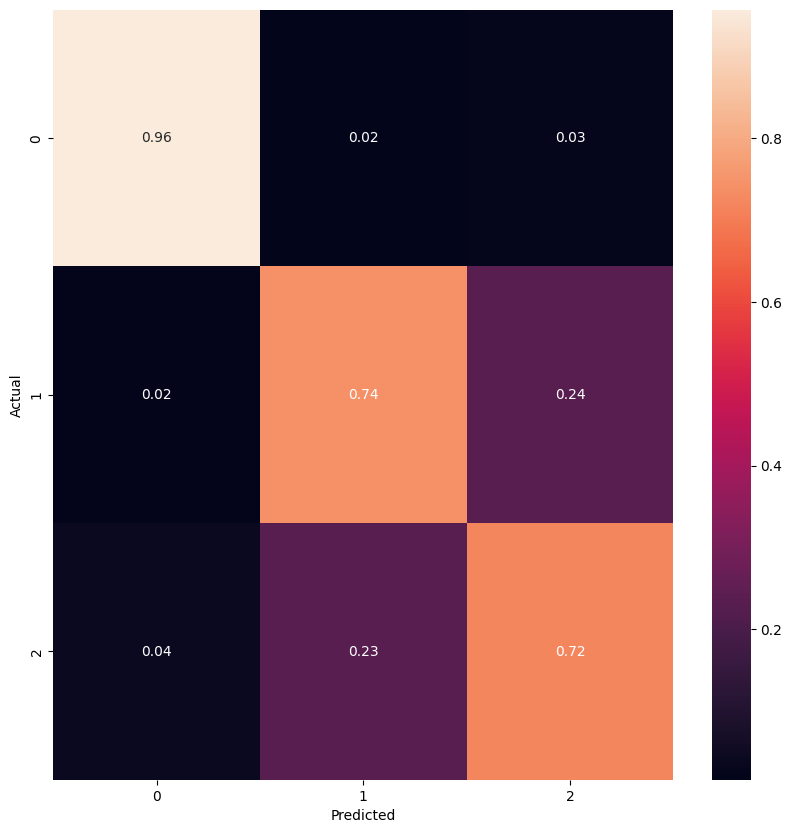

In [15]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cmn, annot=True, fmt='.2f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

# bSMOTE with SVM

In [16]:
from imblearn.over_sampling import SVMSMOTE
df = pd.read_csv('DTI_with_group.csv')
# remove unnecessary columns + confounding
df = df.drop(['IMAGEUID', 'COLPROT', 'RID', 'VISCODE', 
                          'VISCODE2', 'EXAMDATE', 'VERSION', 'MANUFACTURER',
                         'RUNDATE', 'STATUS', 'QC', 'update_stamp', 'Age', 'VOLUMES', 'Sex'], axis=1)
# remove rows with empty values
df = df.dropna()

In [17]:
X = df.iloc[:, df.columns != 'Research Group'].values
y = df.iloc[:, -1].values
X_resampled, y_resampled = SVMSMOTE().fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=23)

In [18]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=2000, learning_rate=learning_rate, max_depth=5, random_state=23)
    gb_clf.fit(X_train, y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_test, y_test)))

Learning rate:  0.05
Accuracy score (training): 1.000
Accuracy score (validation): 0.838
Learning rate:  0.075
Accuracy score (training): 1.000
Accuracy score (validation): 0.836
Learning rate:  0.1
Accuracy score (training): 1.000
Accuracy score (validation): 0.834
Learning rate:  0.25
Accuracy score (training): 1.000
Accuracy score (validation): 0.828
Learning rate:  0.5
Accuracy score (training): 1.000
Accuracy score (validation): 0.840
Learning rate:  0.75
Accuracy score (training): 1.000
Accuracy score (validation): 0.826
Learning rate:  1
Accuracy score (training): 1.000
Accuracy score (validation): 0.806


In [20]:
gb_clf2 = GradientBoostingClassifier(n_estimators=2000, learning_rate=0.05, max_depth=5, random_state=23)
gb_clf2.fit(X_train, y_train)
predictions = gb_clf2.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix:
[[ 65   4   0   1   2   0]
 [  2 113  10   0  21   6]
 [  0   8  69   3   4   0]
 [  0   1   0  63   5   0]
 [  1  19   2   0 126   1]
 [  0   3   2   0   1  60]]
Classification Report
              precision    recall  f1-score   support

          AD       0.96      0.90      0.93        72
          CN       0.76      0.74      0.75       152
        EMCI       0.83      0.82      0.83        84
        LMCI       0.94      0.91      0.93        69
         MCI       0.79      0.85      0.82       149
         SMC       0.90      0.91      0.90        66

    accuracy                           0.84       592
   macro avg       0.86      0.86      0.86       592
weighted avg       0.84      0.84      0.84       592



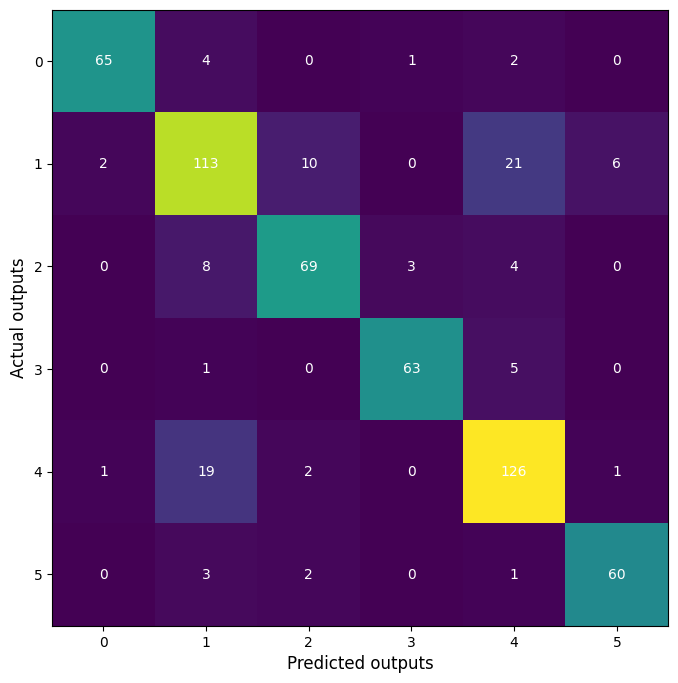

In [21]:
cm = confusion_matrix(y_test, predictions)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', fontsize=12, color='black')
ax.set_ylabel('Actual outputs', fontsize=12, color='black')
ax.xaxis.set(ticks=range(6))
ax.yaxis.set(ticks=range(6))
for i in range(6):
    for j in range(6):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

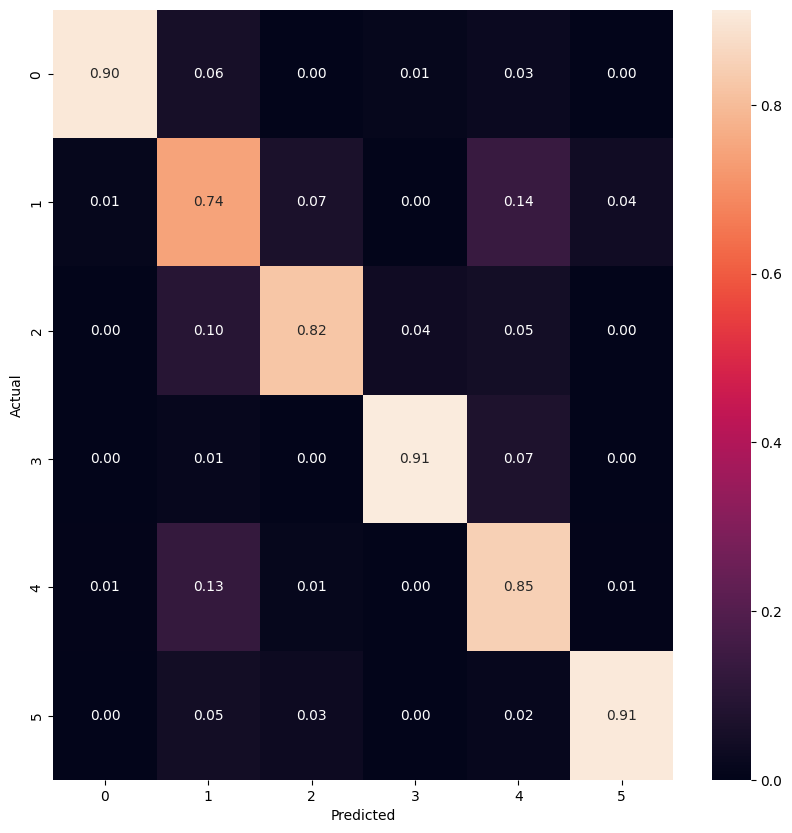

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cmn, annot=True, fmt='.2f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

### Combined MCI groups

In [23]:
df = pd.read_csv('DTI_with_group_comb.csv')
# remove unnecessary columns + confounding
df = df.drop(['IMAGEUID', 'COLPROT', 'RID', 'VISCODE', 
                          'VISCODE2', 'EXAMDATE', 'VERSION', 'MANUFACTURER',
                         'RUNDATE', 'STATUS', 'QC', 'update_stamp', 'Age', 'VOLUMES', 'Sex'], axis=1)
# remove rows with empty values
df = df.dropna()

In [24]:
X = df.iloc[:, df.columns != 'Research Group'].values
y = df.iloc[:, -1].values
X_resampled, y_resampled = SVMSMOTE().fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=23)

In [25]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) 

In [26]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=2000, learning_rate=learning_rate, max_depth=5, random_state=23)
    gb_clf.fit(X_train, y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_test, y_test)))

Learning rate:  0.05
Accuracy score (training): 1.000
Accuracy score (validation): 0.799
Learning rate:  0.075
Accuracy score (training): 1.000
Accuracy score (validation): 0.810
Learning rate:  0.1
Accuracy score (training): 1.000
Accuracy score (validation): 0.792
Learning rate:  0.25
Accuracy score (training): 1.000
Accuracy score (validation): 0.808
Learning rate:  0.5
Accuracy score (training): 1.000
Accuracy score (validation): 0.782
Learning rate:  0.75
Accuracy score (training): 1.000
Accuracy score (validation): 0.775
Learning rate:  1
Accuracy score (training): 1.000
Accuracy score (validation): 0.794


In [27]:
gb_clf2 = GradientBoostingClassifier(n_estimators=2000, learning_rate=0.075, max_depth=5, random_state=23)
gb_clf2.fit(X_train, y_train)
predictions = gb_clf2.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix:
[[ 97   1   3]
 [  3 115  30]
 [  2  42 134]]
Classification Report
              precision    recall  f1-score   support

          AD       0.95      0.96      0.96       101
          CN       0.73      0.78      0.75       148
         MCI       0.80      0.75      0.78       178

    accuracy                           0.81       427
   macro avg       0.83      0.83      0.83       427
weighted avg       0.81      0.81      0.81       427



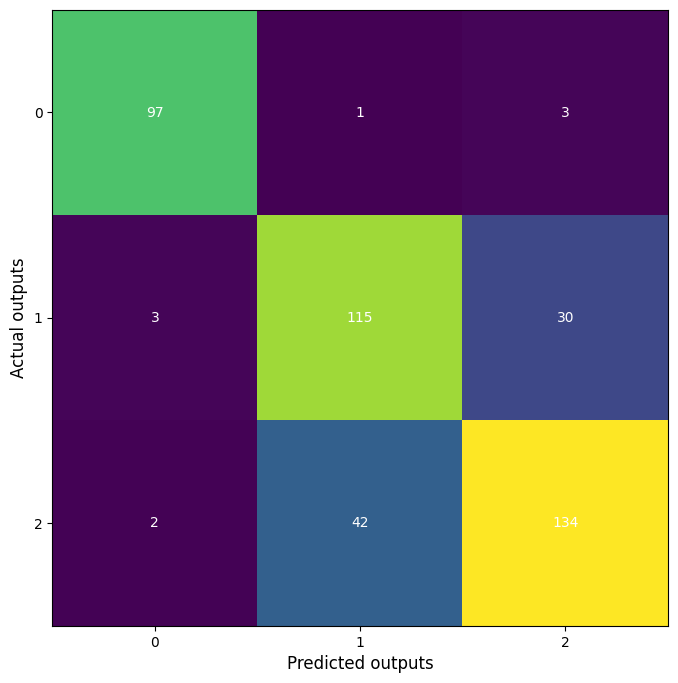

In [28]:
cm = confusion_matrix(y_test, predictions)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', fontsize=12, color='black')
ax.set_ylabel('Actual outputs', fontsize=12, color='black')
ax.xaxis.set(ticks=range(3))
ax.yaxis.set(ticks=range(3))
for i in range(3):
    for j in range(3):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

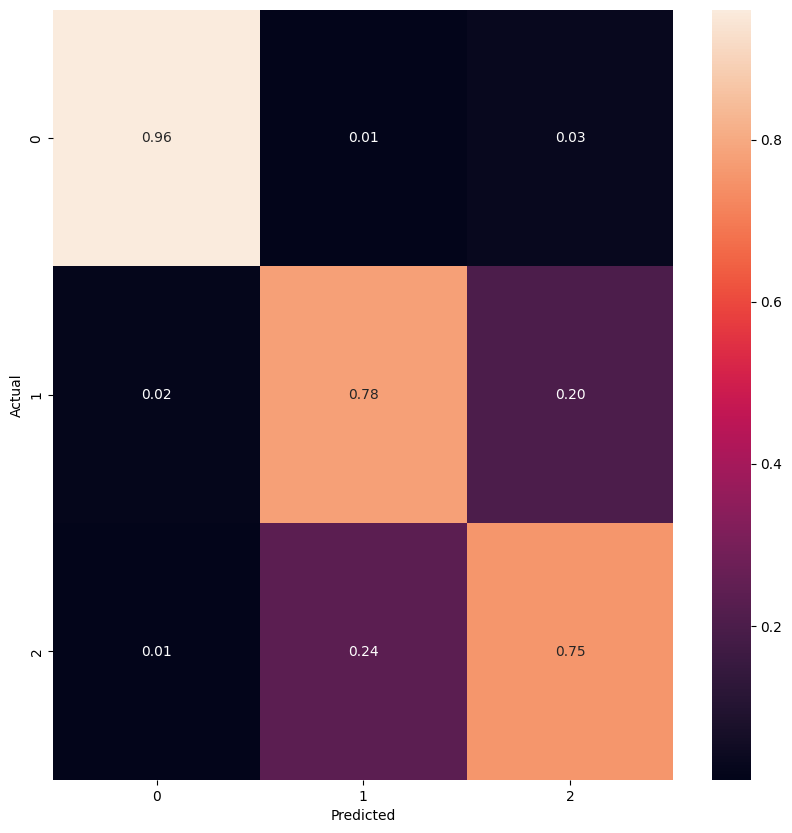

In [29]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cmn, annot=True, fmt='.2f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

# SMOTE + ENN

In [30]:
df = pd.read_csv('DTI_with_group.csv')
# remove unnecessary columns + confounding
df = df.drop(['IMAGEUID', 'COLPROT', 'RID', 'VISCODE', 
                          'VISCODE2', 'EXAMDATE', 'VERSION', 'MANUFACTURER',
                         'RUNDATE', 'STATUS', 'QC', 'update_stamp', 'Age', 'VOLUMES', 'Sex'], axis=1)
# remove rows with empty values
df = df.dropna()

In [31]:
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(random_state=4)
X = df.iloc[:, df.columns != 'Research Group'].values
y = df.iloc[:, -1].values
X_resampled, y_resampled = smote_enn.fit_resample(X, y)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=23)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=2000, learning_rate=learning_rate, max_depth=5, random_state=23)
    gb_clf.fit(X_train, y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_test, y_test)))

Learning rate:  0.05
Accuracy score (training): 1.000
Accuracy score (validation): 0.965
Learning rate:  0.075
Accuracy score (training): 1.000
Accuracy score (validation): 0.969
Learning rate:  0.1
Accuracy score (training): 1.000
Accuracy score (validation): 0.968
Learning rate:  0.25
Accuracy score (training): 1.000
Accuracy score (validation): 0.964
Learning rate:  0.5
Accuracy score (training): 1.000
Accuracy score (validation): 0.961
Learning rate:  0.75
Accuracy score (training): 1.000
Accuracy score (validation): 0.955
Learning rate:  1
Accuracy score (training): 0.999
Accuracy score (validation): 0.937


In [34]:
gb_clf2 = GradientBoostingClassifier(n_estimators=2000, learning_rate=0.075, max_depth=5, random_state=23)
gb_clf2.fit(X_train, y_train)
predictions = gb_clf2.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix:
[[145   0   0   1   1   1]
 [  0   2   1   1   3   0]
 [  1   0 129   2   1   0]
 [  2   0   0 144   0   0]
 [  1   0   2   0 118   5]
 [  0   0   0   0   0 158]]
Classification Report
              precision    recall  f1-score   support

          AD       0.97      0.98      0.98       148
          CN       1.00      0.29      0.44         7
        EMCI       0.98      0.97      0.97       133
        LMCI       0.97      0.99      0.98       146
         MCI       0.96      0.94      0.95       126
         SMC       0.96      1.00      0.98       158

    accuracy                           0.97       718
   macro avg       0.97      0.86      0.88       718
weighted avg       0.97      0.97      0.97       718



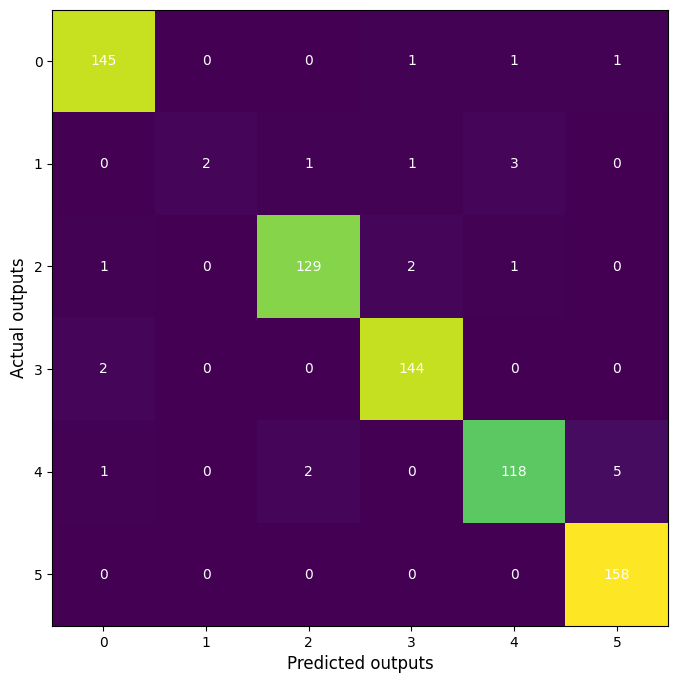

In [35]:
cm = confusion_matrix(y_test, predictions)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', fontsize=12, color='black')
ax.set_ylabel('Actual outputs', fontsize=12, color='black')
ax.xaxis.set(ticks=range(6))
ax.yaxis.set(ticks=range(6))
for i in range(6):
    for j in range(6):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

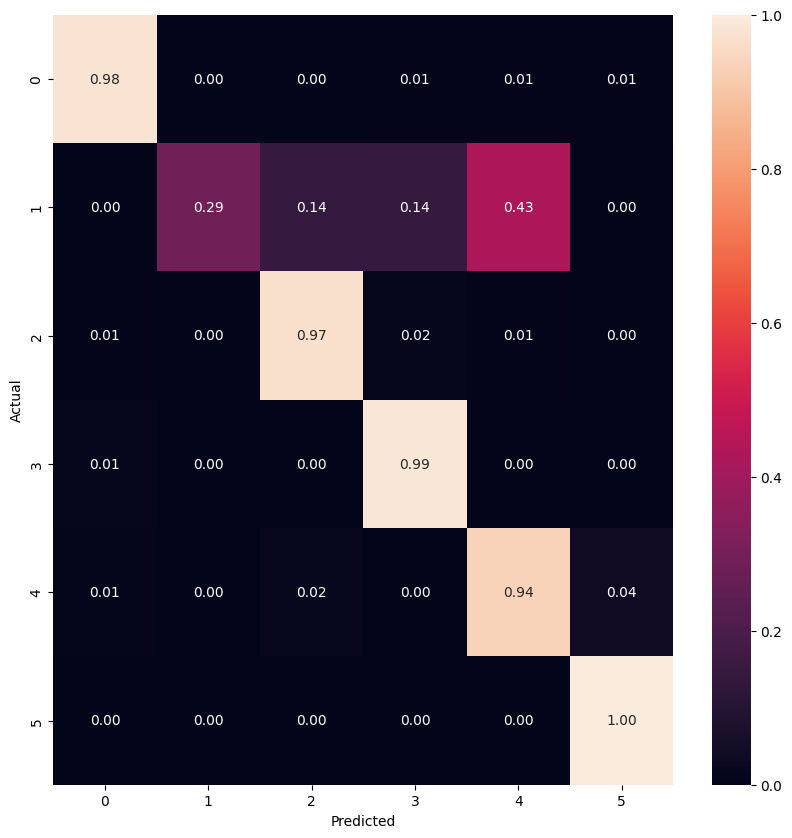

In [36]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cmn, annot=True, fmt='.2f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

### Combined MCI groups

In [37]:
df = pd.read_csv('DTI_with_group_comb.csv')
# remove unnecessary columns + confounding
df = df.drop(['IMAGEUID', 'COLPROT', 'RID', 'VISCODE', 
                          'VISCODE2', 'EXAMDATE', 'VERSION', 'MANUFACTURER',
                         'RUNDATE', 'STATUS', 'QC', 'update_stamp', 'Age', 'VOLUMES', 'Sex'], axis=1)
# remove rows with empty values
df = df.dropna()

In [38]:
smote_enn = SMOTEENN(random_state=4)
X = df.iloc[:, df.columns != 'Research Group'].values
y = df.iloc[:, -1].values
X_resampled, y_resampled = smote_enn.fit_resample(X, y)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=23)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [40]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=2000, learning_rate=learning_rate, max_depth=5, random_state=23)
    gb_clf.fit(X_train, y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_test, y_test)))

Learning rate:  0.05
Accuracy score (training): 1.000
Accuracy score (validation): 0.934
Learning rate:  0.075
Accuracy score (training): 1.000
Accuracy score (validation): 0.934
Learning rate:  0.1
Accuracy score (training): 1.000
Accuracy score (validation): 0.930
Learning rate:  0.25
Accuracy score (training): 1.000
Accuracy score (validation): 0.940
Learning rate:  0.5
Accuracy score (training): 1.000
Accuracy score (validation): 0.934
Learning rate:  0.75
Accuracy score (training): 1.000
Accuracy score (validation): 0.934
Learning rate:  1
Accuracy score (training): 1.000
Accuracy score (validation): 0.924


In [41]:
gb_clf2 = GradientBoostingClassifier(n_estimators=2000, learning_rate=0.25, max_depth=5, random_state=23)
gb_clf2.fit(X_train, y_train)
predictions = gb_clf2.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix:
[[176   0   0]
 [  0  17  11]
 [  3   4  91]]
Classification Report
              precision    recall  f1-score   support

          AD       0.98      1.00      0.99       176
          CN       0.81      0.61      0.69        28
         MCI       0.89      0.93      0.91        98

    accuracy                           0.94       302
   macro avg       0.89      0.85      0.87       302
weighted avg       0.94      0.94      0.94       302



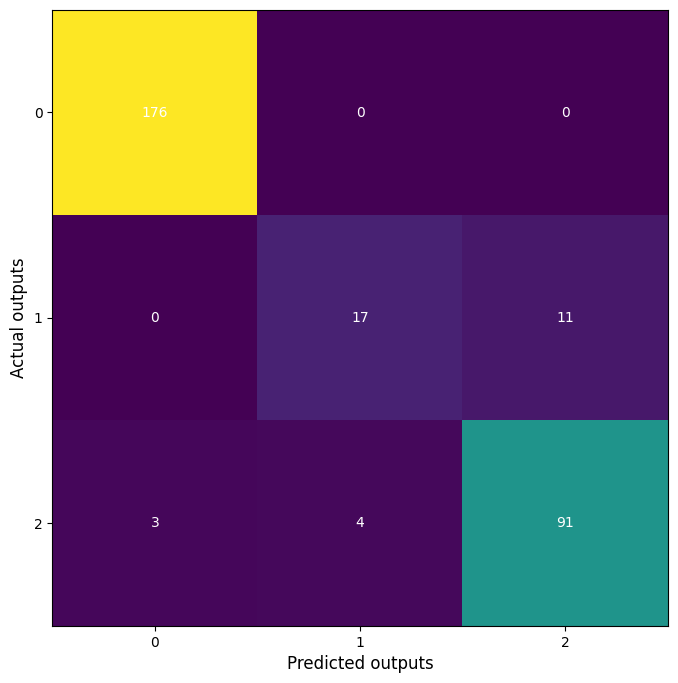

In [42]:
cm = confusion_matrix(y_test, predictions)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', fontsize=12, color='black')
ax.set_ylabel('Actual outputs', fontsize=12, color='black')
ax.xaxis.set(ticks=range(3))
ax.yaxis.set(ticks=range(3))
for i in range(3):
    for j in range(3):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

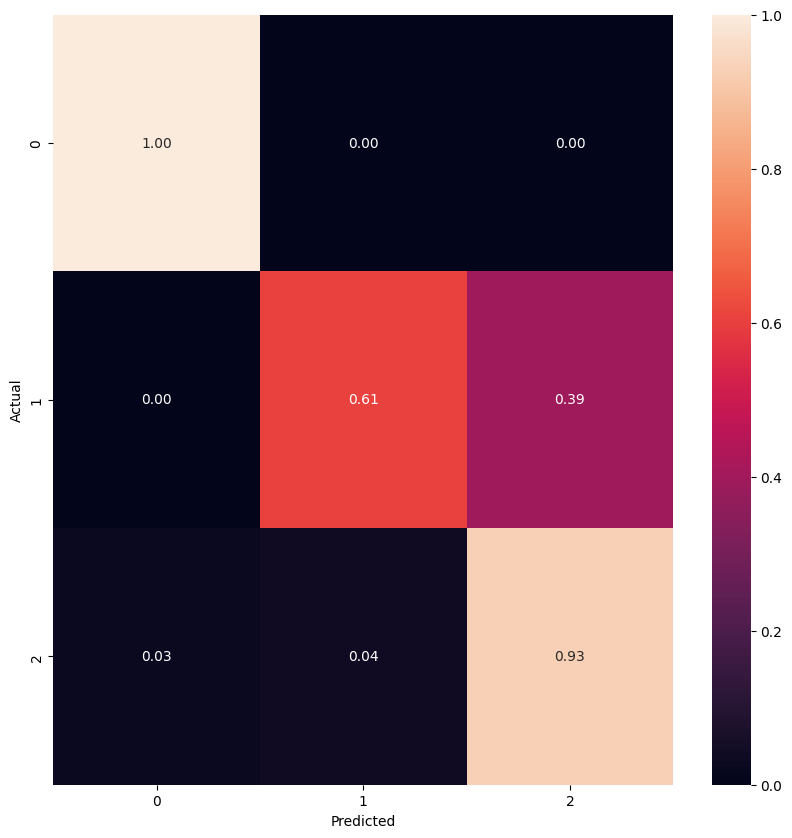

In [43]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cmn, annot=True, fmt='.2f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)